# 01. Instacart Business Questions

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4\Data'

In [3]:
insta= pd.read_pickle(os.path.join(path, 'Prepared Data', 'custs_ords_prods.pkl'), compression= 'infer')

In [ ]:
#regarding PII, the customers first and last name, combined with their location, can be sensitive, identifying information. When presenting I will be sure to bring this up.

In [5]:
#creating a northeast region list
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [6]:
# Creating Midwest Region List
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [7]:
# Creating South Region List
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [8]:
# Creating West Region List
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [16]:
#crossing region and spending variables to analyze regional spending habits
crosstab=pd.crosstab(insta['region'], insta['spending_flag'], dropna=False)

In [ ]:
#as you can see, the south region has the highest number of high spenders, and also has the highest number of low spenders

In [4]:
#creating an exclusion flag for low-activity customers
insta.loc[insta['max_order']<5,'customer_activity_flag']='Low Activity'

In [5]:
#creating an exclusion flag for high-activity customers
insta.loc[insta['max_order']>5,'customer_activity_flag']='High Activity'

In [6]:
# Creating Separate Dataframe for only High-Activity Customers
insta_high_activity=insta[insta['customer_activity_flag']=='High Activity']

In [23]:
# Check new dataframe of only high activity customers
insta_high_activity.shape

(30199644, 34)

In [24]:
# Exporting New Dataframe of only high activity customers
insta_high_activity.to_pickle(os.path.join(path, 'Prepared Data','insta_high_activity.pkl'))

# 02. Profiling customers based on age, income, number of dependants

In [26]:
#profiling customers based on age
insta['Age'].describe()

count    3.243506e+07
mean     4.946512e+01
std      1.848555e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [7]:
# Creating Young Adult age group 
insta.loc[insta['Age']<=30,'age_group']='Young Adult'

In [8]:
# Creating Middle-Age Adult age group
insta.loc[(insta['Age']>30)&(insta['Age']<=60),'age_group']='Middle-Age Adult'

In [9]:
# Creating Senior age group
insta.loc[insta['Age']>60,'age_group']='Senior'

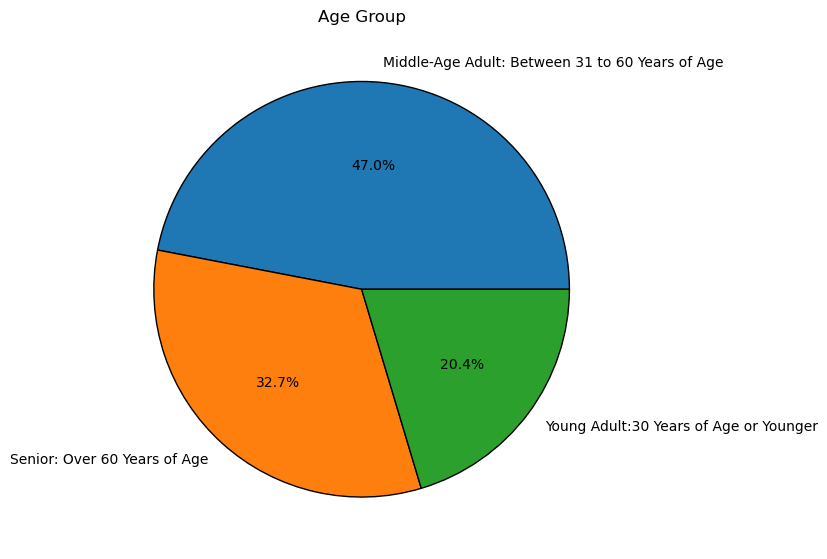

In [32]:
# Creating Pie Chart of Age Groups
age_group_counts = insta['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [33]:
newpath= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4'

In [34]:
# Exporting Age Group Pie Chart Visualizations
age_group_pie_chart.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','age_group_distribution_pie_chart.png'))

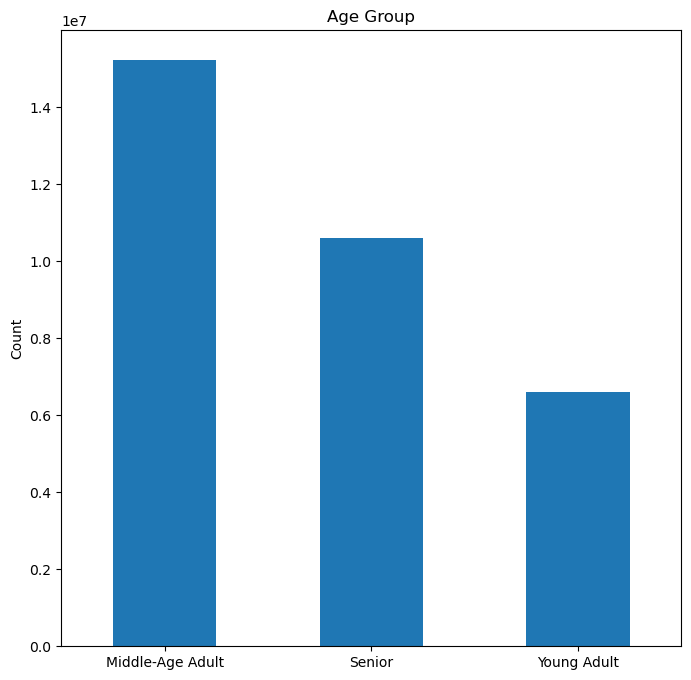

In [35]:
# Creating Bar Chart of Age Groups
age_group_counts = insta['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_bar=age_group_counts.plot.bar(rot=0)
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()


In [36]:
# Exporting Age Group Bar Chart
age_group_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','age_group_distribution_bar_chart.png'))

In [10]:
# Creating Low Income group 
insta.loc[insta['income']<=65000,'income_group']='Low Income'

In [11]:
# Creating Middle Income group
insta.loc[(insta['income']>65000)&(insta['income']<=130000),'income_group']='Middle Income'

In [12]:
# Creating High Income group
insta.loc[insta['income']>130000,'income_group']='High Income'

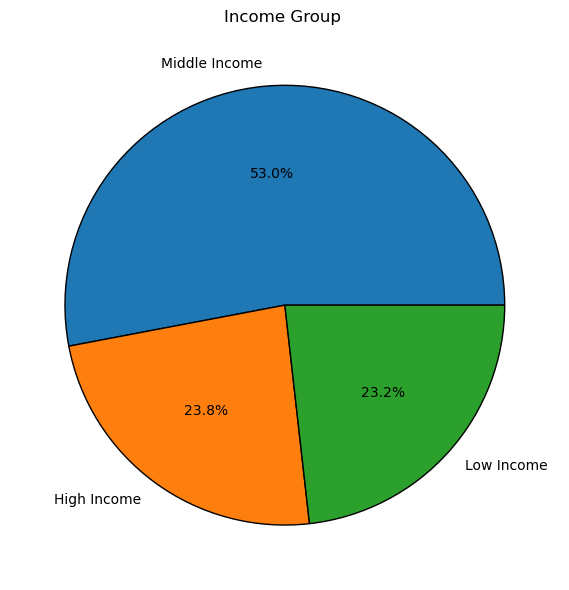

In [42]:
# Creating Pie Chart of Income Groups
income_group_counts = insta['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [43]:
# Exporting Income Group Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','income_group_distribution_pie.png'))

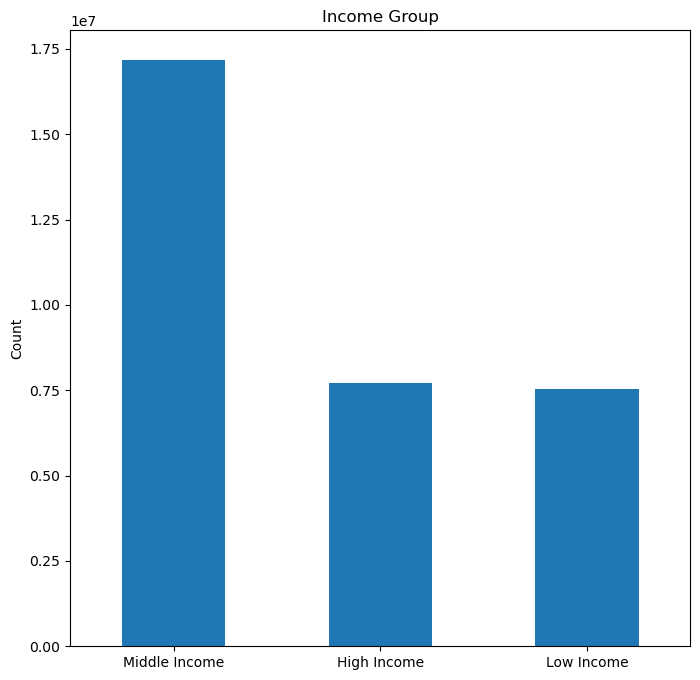

In [44]:
# Creating Bar Chart of Income Groups
income_group_counts = insta['income_group'].value_counts()
plt.figure(figsize=(8,8))
income_group_bar=income_group_counts.plot.bar(rot=0)
plt.title('Income Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [45]:
#Exporting income group bar chart
income_group_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','income_group_distribution_bar.png'))

In [46]:
insta['number_of_dependants'].value_counts(dropna=False)

number_of_dependants
3    8142515
0    8105345
2    8098734
1    8088465
Name: count, dtype: int64

In [13]:
# Creating Small dependant group 
insta.loc[insta['number_of_dependants']<=1,'dependant_size']='Small'

In [14]:
# Creating Medium dependants group
insta.loc[insta['number_of_dependants']==2,'dependant_size']='Medium'

In [15]:
# Creating Large dependants group
insta.loc[insta['number_of_dependants']>=3,'dependant_size']='Large'

In [51]:
insta['dependant_size'].value_counts(dropna=False)

dependant_size
Small     16193810
Large      8142515
Medium     8098734
Name: count, dtype: int64

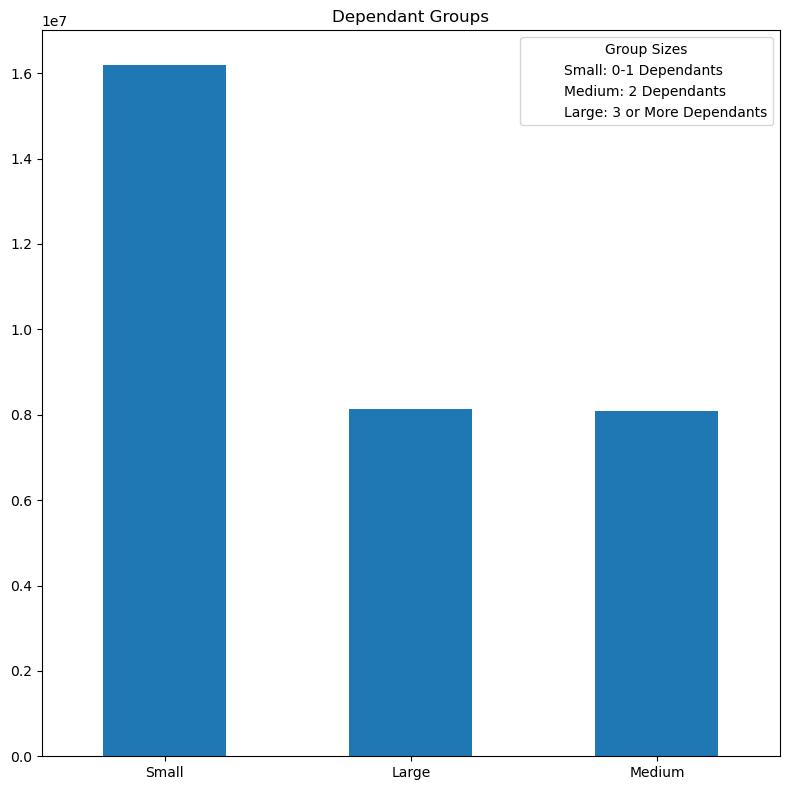

In [52]:
# Creating Bar Chart of Dependant Groups
import matplotlib.patches as mpatches
dependants_group_counts = insta['dependant_size'].value_counts()
plt.figure(figsize=(8,8))
dependant_group_bar=dependants_group_counts.plot.bar(rot=0)
plt.title('Dependant Groups')
plt.xlabel('')
plt.ylabel('')

# Create proxy artists for the legend
small_patch = mpatches.Patch(color='none',label='Small: 0-1 Dependants')
medium_patch = mpatches.Patch(color='none',label='Medium: 2 Dependants')
large_patch = mpatches.Patch(color='none',label='Large: 3 or More Dependants')

# Add the custom legend
plt.legend(handles=[small_patch, medium_patch, large_patch], title='Group Sizes')

plt.tight_layout()
plt.show()

In [53]:
# Exporting Dependant Group Bar Chart
dependant_group_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','dependant_group_bar.png'))

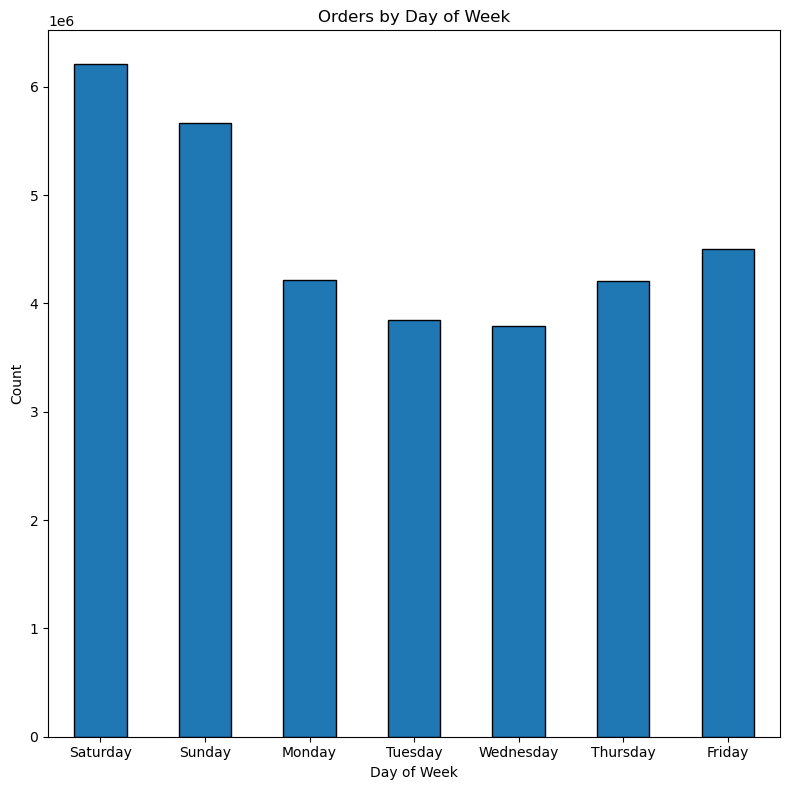

In [54]:
#profile by order dow
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Bar Chart
plt.figure(figsize=(8, 8))
ords_day_by_week = insta['orders_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [55]:
# Exporting Order by Day of Week Bar Chart
ords_day_by_week.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','ords_day_of_week.png'))

In [16]:
# Creating weekend flag
insta.loc[insta['orders_day_of_week'].isin([0,1]),'week_day_category']='Weekend'

In [17]:
# Creating weekday flag
insta.loc[insta['orders_day_of_week'].isin([2,3,4,5,6]),'week_day_category']='Weekday'

In [18]:
# Checking new column week_day_category frequency
insta['week_day_category'].value_counts(dropna=False)

week_day_category
Weekday    20559300
Weekend    11875759
Name: count, dtype: int64

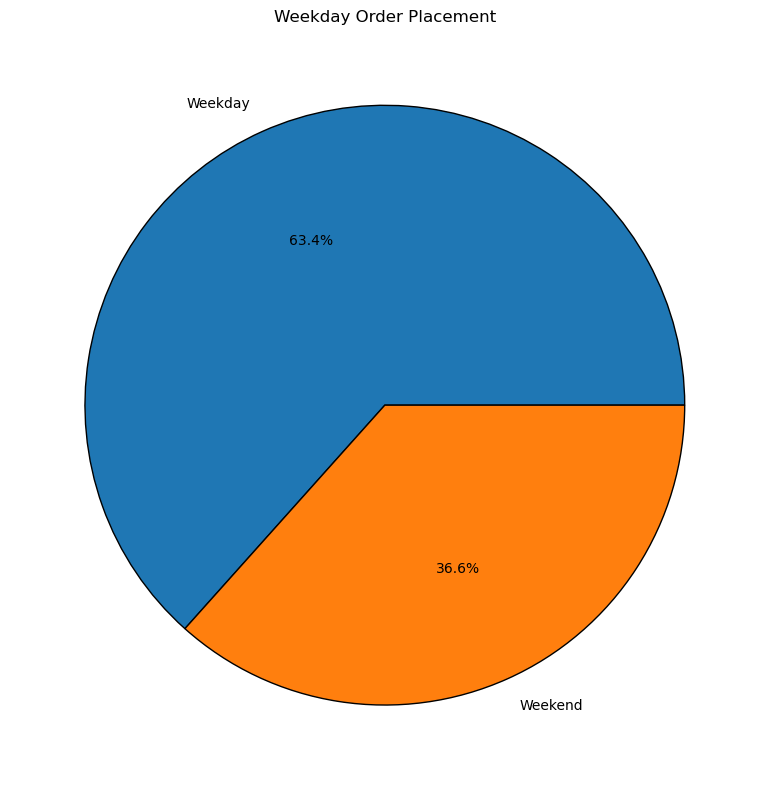

In [59]:
# Creating Pie Chart of Weekday Order Groups
week_day_count = insta['week_day_category'].value_counts()
plt.figure(figsize=(8,8))
week_day_order_count_pie=week_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Weekday Order Placement')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [60]:
# Exporting Weekdday Order Placement Pie Chart
week_day_order_count_pie.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','week_day_order_placement_comparison_pie.png'))

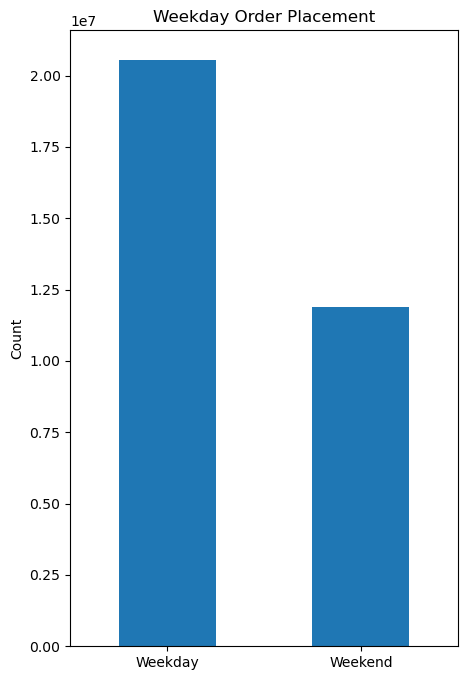

In [61]:
# Creating Bar Chart of Weekday Order Groups
week_day_count = insta['week_day_category'].value_counts()
plt.figure(figsize=(5,8))
week_day_order_count_bar=week_day_count.plot.bar(rot=0)
plt.title('Weekday Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [62]:
# Exporting Weekday Order PLacement Bar Chart
week_day_order_count_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','week_day_order_placement_comparison_bar.png'))

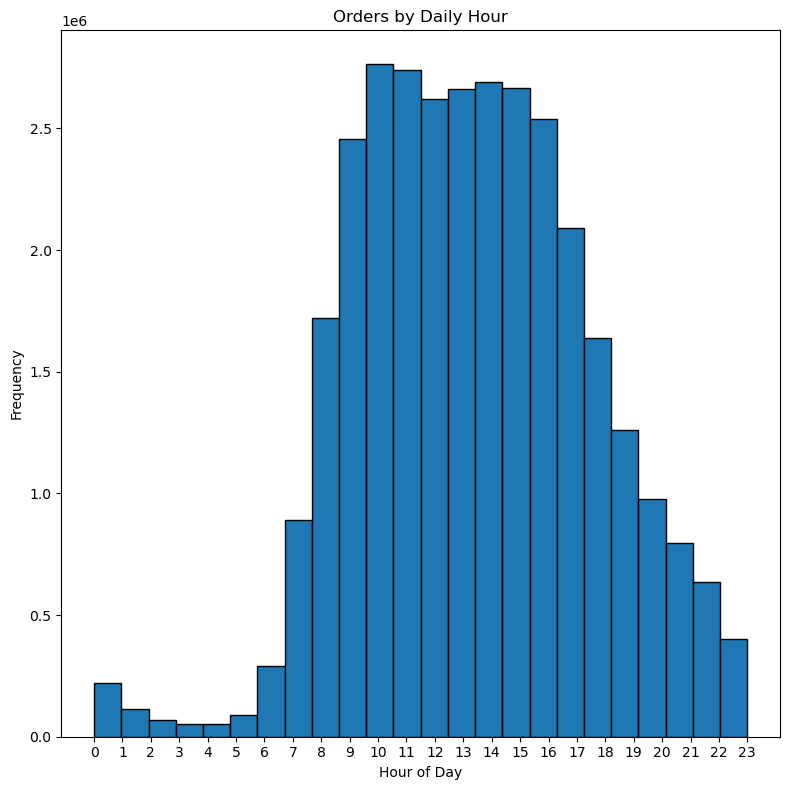

In [64]:
#Creating a histogram for orders by hour
plt.figure(figsize=(8, 8))
ords_hour_by_day=insta['order_hour'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Daily Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [65]:
#Exporting histogram of orders by hour
ords_hour_by_day.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','ords_hour_by_day_hist.png'))

In [19]:
# Creating morning order group 
insta.loc[insta['order_hour']<12,'order_hour_group']='Morning'

In [20]:
# Creating afternoon order group
insta.loc[(insta['order_hour']>=12)&(insta['order_hour']<=17),'order_hour_group']='Afternoon'

In [21]:
# Creating Evening order group 
insta.loc[insta['order_hour']>17,'order_hour_group']='Evening'

In [22]:
# Checking frequency of new column order_hour_group
insta['order_hour_group'].value_counts(dropna=False)

order_hour_group
Afternoon    15267441
Morning      11459454
Evening       5708164
Name: count, dtype: int64

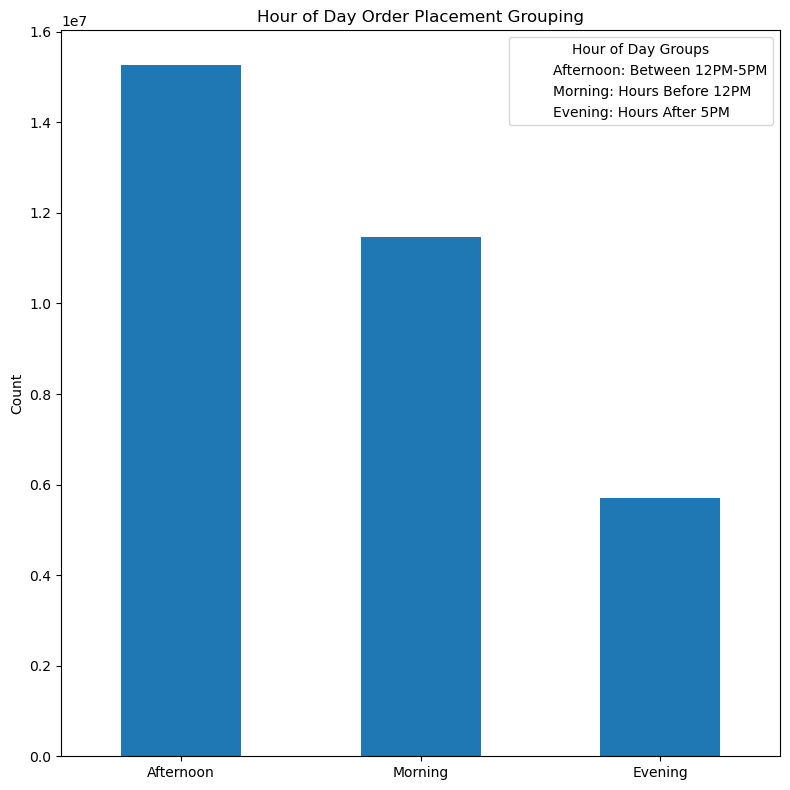

In [72]:
# Creating Bar Chart of Hour Grouping Orders
order_hour_group_count = insta['order_hour_group'].value_counts()
plt.figure(figsize=(8,8))
order_hour_group_count_bar=order_hour_group_count.plot.bar(rot=0)
plt.title('Hour of Day Order Placement Grouping')
plt.xlabel('')
plt.ylabel('Count')

# Create proxy artists for the legend
small_patch = mpatches.Patch(color='none',label='Afternoon: Between 12PM-5PM')
medium_patch = mpatches.Patch(color='none',label='Morning: Hours Before 12PM')
large_patch = mpatches.Patch(color='none',label='Evening: Hours After 5PM')

# Add the custom legend
plt.legend(handles=[small_patch, medium_patch, large_patch], title='Hour of Day Groups')

plt.tight_layout()
plt.show()
plt.tight_layout
plt.show()

In [73]:
#Exporting order hour group bar chart
order_hour_group_count_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','orders_hour_group_comparison_bar.png'))

# 03. Customer profile aggregations

In [74]:
insta.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'Unnamed: 0',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest day',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_price',
 'spending_flag',
 'median_days',
 'frequency_flag',
 'First Name',
 'Last Name',
 'Gender',
 'STATE',
 'Age',
 'number_of_dependants',
 'fam_status',
 'income',
 '_merge',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

In [80]:
#creating aggregation subset of customer profile
cust_profile_agg=insta.groupby(['user_id','order_number','days_since_prior_order','loyalty_flag','spending_flag','frequency_flag','STATE','region','customer_activity_flag','age_group','income','income_group','fam_status','dependant_size','week_day_category','orders_day_of_week','order_hour_group','order_hour'])['prices'].sum().reset_index()

In [82]:
# Creating subset of user focused breakdown
user_agg=cust_profile_agg.groupby('user_id').agg({'order_number': ['mean', 'min', 'max'],'days_since_prior_order': ['mean', 'min', 'max'],
                                        'orders_day_of_week': ['mean', 'min', 'max'],'order_hour': ['mean', 'min', 'max'],
                                        'prices': ['mean', 'min', 'max'],'income':['mean','min','max']})

In [84]:
# Creating aggregation by age_group for days_since_prior_order & prices
age_group_agg=cust_profile_agg.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [86]:
# Creating aggregation by income_group for days_since_prior_order & prices
income_group_agg=cust_profile_agg.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [88]:
# Creating aggregation by dependant_size group for days_since_prior_order & prices dependant_size
dependant_size_agg=cust_profile_agg.groupby('dependant_size').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [90]:
# Creating aggregation by week_day_category group for days_since_prior_order & prices
week_day_category_agg=cust_profile_agg.groupby('week_day_category').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [92]:
# Creating aggregation by order_hour_group for days_since_prior_order & prices
order_hour_group_agg=cust_profile_agg.groupby('order_hour_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [94]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(insta['age_group'],insta['region'],dropna=False)

In [97]:
# Exporting Age Group By Region Bar Chart
age_region_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','age_region_comparison_bar.png'))

In [99]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(insta['age_group'],insta['frequency_flag'])

In [103]:
# Exporting Age Group By Customer Frequency Bar Chart
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','age_customer_frequency_comparison_bar.png'))

In [104]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(insta['age_group'],insta['loyalty_flag'],dropna=False)

In [107]:
# Exporting age group by customer loyalty chart
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','age_group_loyalty_comparison_bar.png'))

In [108]:
# Creating Crosstab Bewtween income_group and region
income_region_comparison=pd.crosstab(insta['income_group'],insta['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

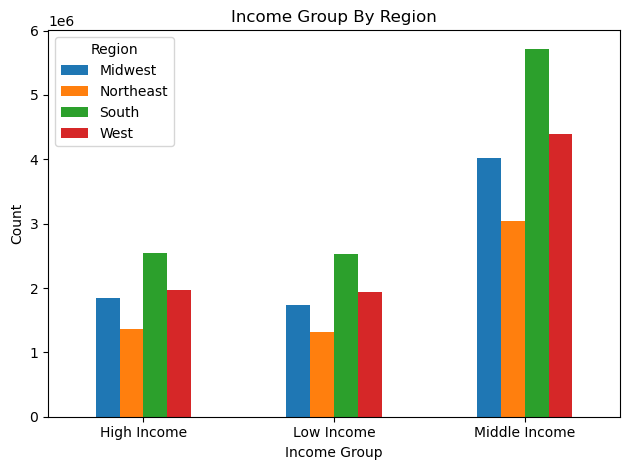

In [110]:
# Creating Bar Chart for Income Group By Region Comparison
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [111]:
# Exporting Income Region Comparison Bar Chart
income_region_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','income_region_comparison_bar.png'))

In [112]:
# Creating Crosstab for dependant_size of customers by region
dependant_size_region_comparison=pd.crosstab(insta['dependant_size'],insta['region'],dropna=False)

In [114]:
# Exporting Dependant Size by Region Comparison Bar Chart
dependant_size_region_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','dependant_size_region_comparison_bar.png'))

In [115]:
# 'Creating Crosstab for Weekday Order placement by Region
week_day_category_region_comparison=pd.crosstab(insta['week_day_category'],insta['region'],dropna=False)

In [117]:
# Exporting Weekday Orders Placement by Region Comparison Bar Chart
week_day_category_region_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','week_day_category_region_comparison_bar.png'))

In [118]:
# Creating Crosstab for Order hour placement by Region
order_hour_group_region_comparison=pd.crosstab(insta['order_hour_group'],insta['region'],dropna=False)

In [120]:
# Exporting Hourly Grouping of Orders By Region Comparison Bar Chart
order_hour_group_region_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','order_hour_group_region_comparison_bar.png'))

In [124]:
# Exporting Region by Customer Frequency Chart
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(newpath,'Analysis','Visualizations','region_customer_frequency_comparison_bar.png'))

In [23]:
insta.to_pickle(os.path.join(path, 'Prepared Data', 'insta_analyzed.pkl'))